<a href="https://colab.research.google.com/github/aissahm/Unicamp-MO431/blob/master/ALO_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aissa Hadj Mohamed - RU 265189

### **2o Exercício de casa**

# **Using Gradient Descent explicitly**


In [0]:
import numpy as np

We define the Rosenbrock function below. We compute the gradient of the function of Rosenbrock by hand and implement the function that returns its gradient given (x1, x2, x3) as below. 

In [0]:
def rosenbrock(x):
  x1 = x[0]
  x2 = x[1]
  x3 = x[2]
  return 100*(x2-x1**2)**2+(1-x1)**2 + 100*(x3-x2**2)**2+(1-x2)**2

def grad_f (x):
  x1 = x[0]
  x2 = x[1]
  x3 = x[2]
  dx1 = 100*2.0*(-2*x1)*(x2-x1**2)-2*(1-x1)
  dx2 = 100*2.0*(x2-x1**2) + 100*2*(-2*x2)*(x3-x2**2) - 2*(1-x2)
  dx3 = 100* 2.0 * (x3-x2**2)
  return np.array([dx1, dx2, dx3])

Below we define the Euclidean norm, and the convergence test.

In [0]:
def euclidean_norm(x):
  return (x[0]**2 + x[1]**2 + x[2]**2 )**(0.5)

def convergence_test (x_new, x_old):
  x = x_new - x_old
  euc_norm_x = euclidean_norm(x)
  euc_norm_x_old = euclidean_norm(x_old)

  if euc_norm_x_old > 0:
    return euc_norm_x / euc_norm_x_old
  else:
    return "error: dividing by null vector"

Below we define the gradient descent function, given a starting point, the minimum distance between two points before stopping the algorithm (called the tolerance), and the maximum number of iterations before stopping the algorithm.

In [0]:
def gradient_descent(x_initial, lr, tolerance_thres, max_iterations):
    x_new =  x_initial - lr * grad_f(x_initial)
    tol = 10
    grad_desc = []
    grad_desc.append( rosenbrock(x_new) )
    x_prev = x_new
    n = 0
    while n < max_iterations:
      x =  x_prev - lr * grad_f(x_prev)
      tol = convergence_test (x, x_prev)
      grad_desc.append( rosenbrock(x))
      x_prev = x
      n = n + 1
      if tol < tolerance_thres:
        break
    return [grad_desc,x_prev]

**With a learning rate of 1.0x10E-4:**

In [0]:
x_initial = np.array([0.0,0.0,0.0])
lr = 1.0*10**(-4)
tolerance_thres = 1.0*10**(-4)
maximum_iterations = 20000
result, final_x  = gradient_descent(x_initial, lr, tolerance_thres, maximum_iterations)

print("learning rate : ", lr)
print("number of iterations: ", len(result))
print("local minimum value reached: ", result[len(result)-1])
print("last position:", final_x)
print("first and last 10 values of Rosenbrock function for each iteration: ", result[:10], " ... ", result[-10:])

learning rate :  0.0001
number of iterations:  5893
local minimum value reached:  0.3387147658078196
last position: [0.7063967  0.49834155 0.24550212]
first and last 10 values of Rosenbrock function for each iteration:  [1.99920407840032, 1.998424137787684, 1.9976595265732997, 1.996909619376872, 1.9961738159731612, 1.995451540281017, 1.9947422393931606, 1.9940453826450537, 1.993360460721271, 1.9926869847978463]  ...  [0.33944241457710167, 0.339361454134837, 0.3392805213671533, 0.3391996162612564, 0.3391187388043588, 0.3390378889836809, 0.33895706678644977, 0.33887627219990013, 0.3387955052112736, 0.3387147658078196]


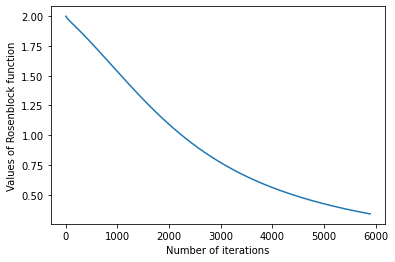

In [0]:
import matplotlib.pyplot as plt
plt.plot(result)
plt.ylabel('Values of Rosenblock function')
plt.xlabel('Number of iterations')
plt.show()

After 5893 iterations, the gradien descent function finally converges. The Rosenbrock function reaches a local minimum of around 0.3387147658078196, in the region [0.7063967  0.49834155 0.24550212] +- tolerance of 1.0x10E-4.  

**With a learning rate of 1.0x10E-3:**

In [0]:
x_initial = np.array([0.0,0.0,0.0])
lr = 1.0*10**(-3)
tolerance_thres = 1.0*10**(-4)
maximum_iterations = 20000
result, final_x  = gradient_descent(x_initial, lr, tolerance_thres, maximum_iterations)

print("learning rate : ", lr)
print("number of iterations: ", len(result))
print("local minimum value reached: ", result[len(result)-1])
print("last position:", final_x)
print("first and last 10 values of Rosenbrock function for each iteration: ", result[:10], " ... ", result[-10:])

learning rate :  0.001
number of iterations:  2491
local minimum value reached:  0.019028769821432884
last position: [0.93688769 0.87752322 0.76941846]
first and last 10 values of Rosenbrock function for each iteration:  [1.9924064032, 1.9861223695947279, 1.9806623562064116, 1.9757180834747496, 1.9710939524398396, 1.9666659783729865, 1.9623556725358053, 1.9581134326350536, 1.9539079832382547, 1.949719665293816]  ...  [0.01923113745503576, 0.019208534759618007, 0.01918596151707724, 0.01916341768350807, 0.01914090321508177, 0.019118418068046077, 0.019095962198725093, 0.01907353556351907, 0.01905113811890429, 0.019028769821432884]


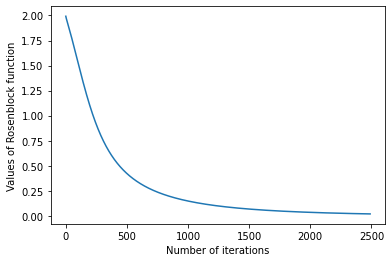

In [0]:
import matplotlib.pyplot as plt
plt.plot(result)
plt.ylabel('Values of Rosenblock function')
plt.xlabel('Number of iterations')
plt.show()

After 2491 iterations, the gradien descent function finally converges. The Rosenbrock function reaches another local minimum of 0.01992876. The higher learning rate of 1.0x10E-3 allowed the gradient descent to jump above the previous local minimum and reach an even lower minimum for the Rosenbrock function. The local minimum is centered around the point [0.93688769 0.87752322 0.76941846] +- tolerance of 1.0x10E-4.


Below we try various learning rate values and see if we can reach an even lower local minimum for the Rosenbrock function.

**With a learning rate of 1.5x10E-3:**

In [0]:
x_initial = np.array([0.0,0.0,0.0])
lr = 1.5*10**(-3)
tolerance_thres = 1.0*10**(-4)
maximum_iterations = 20000
result, final_x  = gradient_descent(x_initial, lr, tolerance_thres, maximum_iterations)

print("learning rate : ", lr)
print("number of iterations: ", len(result))
print("local minimum value reached: ", result[len(result)-1])
print("last position:", final_x)
print("first and last 10 values of Rosenbrock function for each iteration: ", result[:10], " ... ", result[-10:])

learning rate :  0.0015
number of iterations:  2051
local minimum value reached:  0.00976932823562366
last position: [0.95511126 0.91206862 0.83142703]
first and last 10 values of Rosenbrock function for each iteration:  [1.9889126162, 1.9804398814932611, 1.9732080239087, 1.966553276952073, 1.960155726340263, 1.9538617907284832, 1.9475981978343688, 1.941330345407844, 1.9350421794801245, 1.9287264932785537]  ...  [0.009916285435630029, 0.00989983989526623, 0.009883423730479204, 0.009867036883247278, 0.009850679295678675, 0.009834350910011167, 0.009818051668611787, 0.009801781513976395, 0.00978554038872946, 0.00976932823562366]


**With a learning rate of 1.6x10E-3:**

In [0]:
x_initial = np.array([0.0,0.0,0.0])
lr = 1.6*10**(-3)
tolerance_thres = 1.0*10**(-4)
maximum_iterations = 20000
result, final_x  = gradient_descent(x_initial, lr, tolerance_thres, maximum_iterations)

print("learning rate : ", lr)
print("number of iterations: ", len(result))
print("local minimum value reached: ", result[len(result)-1])
print("last position:", final_x)
print("first and last 10 values of Rosenbrock function for each iteration: ", result[:10], " ... ", result[-10:])

learning rate :  0.0016
number of iterations:  1985
local minimum value reached:  0.008754367771180032
last position: [0.95754875 0.91673972 0.83999424]
first and last 10 values of Rosenbrock function for each iteration:  [1.9882379473715202, 1.9793780556988985, 1.9718128538639181, 1.964810491173659, 1.9580388061176661, 1.9513478069643457, 1.9446703296314758, 1.9379767355195314, 1.9312542979299716, 1.924497852358619]  ...  [0.008893757248145506, 0.008878152599675369, 0.00886257732488644, 0.008847031362932066, 0.008831514653107688, 0.00881602713485057, 0.008800568747739332, 0.008785139431493609, 0.008769739125973678, 0.008754367771180032]


**With a learning rate of 1.645x10E-3:**

In [0]:
x_initial = np.array([0.0,0.0,0.0])
lr = 1.645*10**(-3)
tolerance_thres = 1.0*10**(-4)
maximum_iterations = 20000
result, final_x  = gradient_descent(x_initial, lr, tolerance_thres, maximum_iterations)

print("learning rate : ", lr)
print("number of iterations: ", len(result))
print("local minimum value reached: ", result[len(result)-1])
print("last position:", final_x)
print("first and last 10 values of Rosenbrock function for each iteration: ", result[:10], " ... ", result[-10:])

learning rate :  0.001645
number of iterations:  1957
local minimum value reached:  0.008348850272054469
last position: [0.95855993 0.91868297 0.84356932]
first and last 10 values of Rosenbrock function for each iteration:  [1.987936959374428, 1.9789073469729184, 1.971192925518051, 1.9640325195774073, 1.9570900860097118, 1.950218111100496, 1.9433524600297751, 1.9364657248386346, 1.929546577716415, 1.9225906671227695]  ...  [0.008485086349529472, 0.008469832054271965, 0.008454607136793852, 0.0084394115389571, 0.008424245197099197, 0.008409108054480623, 0.008394000047767459, 0.00837892112198673, 0.00836387121431342, 0.008348850272054469]


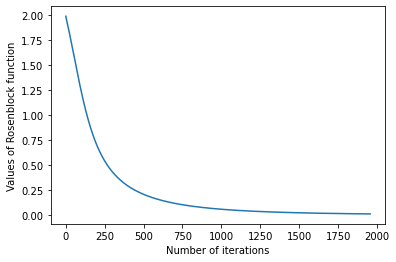

In [0]:
import matplotlib.pyplot as plt
plt.plot(result)
plt.ylabel('Values of Rosenblock function')
plt.xlabel('Number of iterations')
plt.show()

**With a learning rate of 1.7x10E-3:**

In [0]:
x_initial = np.array([0.0,0.0,0.0])
lr = 1.7*10**(-3)
tolerance_thres = 1.0*10**(-4)
maximum_iterations = 20000
result, final_x  = gradient_descent(x_initial, lr, tolerance_thres, maximum_iterations)

print("learning rate : ", lr)
print("number of iterations: ", len(result))
print("local minimum value reached: ", result[len(result)-1])
print("last position:", final_x)
print("first and last 10 values of Rosenbrock function for each iteration: ", result[:10], " ... ", result[-10:])

learning rate :  0.0017
number of iterations:  20001
local minimum value reached:  0.33885913249698146
last position: [0.90922646 0.86917543 0.71899313]
first and last 10 values of Rosenbrock function for each iteration:  [1.98757128592672, 1.9783377822589787, 1.9704413342507974, 1.963086259546989, 1.955933151696729, 1.9488381759709303, 1.9417410654405967, 1.9346170952211512, 1.9274565492313331, 1.9202559798852201]  ...  [0.3421076172664559, 0.33885913249698146, 0.3421076172664559, 0.33885913249698146, 0.3421076172664559, 0.33885913249698146, 0.3421076172664559, 0.33885913249698146, 0.3421076172664559, 0.33885913249698146]


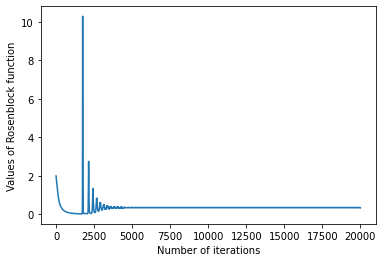

In [0]:
import matplotlib.pyplot as plt
plt.plot(result)
plt.ylabel('Values of Rosenblock function')
plt.xlabel('Number of iterations')
plt.show()

With a learning rate of 1.7x10E-7, the Rosenbrock function keeps jumping between the values 0.338859132 and 0.34210761. The learning rate at this point is too high, the gradient of the Rosenbrock function can't get any lower in absolute value in this region, the distance between two consecutive points stays stable and doesn't diminish below the tolerance threshold. For this reason, we reach the limit of 20,000 iterations without converging to a local minimum. We should also mention the big jump in the Rosenbrock values after 2000 iterations and 4000 as seen on the graph above. The high learning rate value made the gradient descent jump outside of the region of the local mimimum before getting back after 2500 iterations from the first big spike (value above 10 on the graph) in value.

**Conclusion:**

With trial and error, we see that the best learning rate is 1.645x10E-3. We minimize the value of the Rosenbrock function down to 0.008347943212778496 after 1956 iterations, and starting at the origin [0,0,0]. The Rosenbrock function shows us that we need to try various learning rates before reaching a local minimum that is the lowest among the local minimums.

# **Using Tensorflow**

**We start with a learning rate of 1.0x10E-3**

In [0]:
import numpy as np
import tensorflow as tf

max_num_iterations = 20000
tolerance_thres = 1.0*10**(-4)
lr = 1.0*10**(-4)

#starting point
x1 = tf.Variable(0.0, trainable=True)
x2 = tf.Variable(0.0 , trainable=True)
x3 = tf.Variable(0.0 , trainable=True)

def euclidean_norm(x):
  return (x[0]**2 + x[1]**2 + x[2]**2 )**(0.5)

def convergence_test (x_new, x_old):
  x = x_new - x_old
  euc_norm_x = euclidean_norm(x)
  euc_norm_x_old = euclidean_norm(x_old)

  if euc_norm_x_old > 0:
    return euc_norm_x / euc_norm_x_old
  else:
    return "error"

def rosenbrock(x):
  x1 = x[0]
  x2 = x[1]
  x3 = x[2]
  return 100*(x2-x1**2)**2+(1-x1)**2 + 100*(x3-x2**2)**2+(1-x2)**2

def step():
  with tf.GradientTape(persistent=True) as tape:
    tape.watch(x1)
    tape.watch(x2)
    tape.watch(x3)
    y = 100*(x2-x1**2)**2+(1-x1)**2 + 100*(x3-x2**2)**2+(1-x2)**2
  
  #we calculate the gradient of the Rosenbrock function
  x1_grad = tape.gradient(y, x1).numpy()
  x2_grad = tape.gradient(y, x2).numpy()
  x3_grad = tape.gradient(y, x3).numpy()

  #we update the variables
  x1.assign_sub(x1_grad * lr)
  x2.assign_sub(x2_grad * lr)
  x3.assign_sub(x3_grad * lr)

rosenbrock_values = []
n = 0

#we update the variables initially so that we don't start with the null vector
step()
x = np.array( [x1.numpy(), x2.numpy(), x3.numpy()] )
rosenbrock_values.append(rosenbrock(x))

while n < max_num_iterations:
  x_prev = np.array( [x1.numpy(), x2.numpy(), x3.numpy()] )
  step()
  x = np.array( [x1.numpy(), x2.numpy(), x3.numpy()] )
  rosenbrock_values.append(rosenbrock(x))
  tol = convergence_test (x, x_prev)
  n = n + 1
  if tol < tolerance_thres :
    break

print("learning rate : ", lr)
print("number of iterations: ", len(rosenbrock_values))
print("local minimum value reached: ", rosenbrock_values[len(rosenbrock_values)-1])
print("last position:", x)
print("first and last 10 values of Rosenbrock function for each iteration: ", rosenbrock_values[:10], " ... ", rosenbrock_values[-10:])

learning rate :  0.0001
number of iterations:  5893
local minimum value reached:  0.3387153160218814
last position: [0.7063964  0.49834117 0.24550174]
first and last 10 values of Rosenbrock function for each iteration:  [1.9992040784203238, 1.9984241377541572, 1.9976595265997286, 1.9969096193538025, 1.996173815850419, 1.9954515400565542, 1.9947422392017264, 1.9940453824494806, 1.993360460573659, 1.9926869847566875]  ...  [0.3394429322613658, 0.33936198712137633, 0.33928106428916105, 0.33920015528661535, 0.33911927704954176, 0.33903842110684634, 0.3389576029744561, 0.33887681557350985, 0.33879605044088557, 0.3387153160218814]


**We do the exact same thing we did above, with a learning rate of 1.0x10E-3**

In [0]:
lr = 1.0*10**(-3)
#starting point
x1 = tf.Variable(0.0, trainable=True)
x2 = tf.Variable(0.0 , trainable=True)
x3 = tf.Variable(0.0 , trainable=True)

rosenbrock_values = []
n = 0

#updating the variables once so that we don't start at the origin
step()
x = np.array( [x1.numpy(), x2.numpy(), x3.numpy()] )
rosenbrock_values.append(rosenbrock(x))

while n < max_num_iterations:
  x_prev = np.array( [x1.numpy(), x2.numpy(), x3.numpy()] )
  step()
  x = np.array( [x1.numpy(), x2.numpy(), x3.numpy()] )
  rosenbrock_values.append(rosenbrock(x))
  tol = convergence_test (x, x_prev)
  n = n + 1
  if tol < tolerance_thres :
    break

print("learning rate : ", lr)
print("number of iterations: ", len(rosenbrock_values))
print("local minimum value reached: ", rosenbrock_values[len(rosenbrock_values)-1])
print("last position:", x)
print("first and last 10 values of Rosenbrock function for each iteration: ", rosenbrock_values[:10], " ... ", rosenbrock_values[-10:])

learning rate :  0.001
number of iterations:  2491
local minimum value reached:  0.01902871111779364
last position: [0.9368878 0.8775234 0.7694188]
first and last 10 values of Rosenbrock function for each iteration:  [1.992406402858551, 1.9861223689625118, 1.9806623555592853, 1.97571808318245, 1.971093952762197, 1.9666659783394154, 1.9623556726334834, 1.9581134309429822, 1.9539079797599965, 1.9497196604504599]  ...  [0.019231085807660014, 0.019208481240385444, 0.01918590749070726, 0.01916336577266993, 0.019140850530687314, 0.019118369250178558, 0.019095912391867587, 0.019073486186770714, 0.0190510843507219, 0.01902871111779364]


**Conclusion:**

We get the exact same number of iterations using Tensorflow as calculating the gradien manually, for both learning rates ( 1.0x10E-4 and 1.0x10E-3 ). However, the precision in terms of values of the Rosenbrock function at each iteration is different in the order of 10E-8, which is negligeable.